<a href="https://colab.research.google.com/github/Flandrab/PythonProject/blob/main/AIProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab_Notes/PercentBodyFat.xlsx')


In [ ]:
print(df.head())


   PercentBodyFat   Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  \
0            12.3  23.0  154.25   67.75  36.2   93.1     85.2   94.5   59.0   
1             6.1  22.0  173.25   72.25  38.5   93.6     83.0   98.7   58.7   
2            25.3  22.0  154.00   66.25  34.0   95.8     87.9   99.2   59.6   
3            10.4  26.0  184.75   72.25  37.4  101.8     86.4  101.2   60.1   
4            28.7  24.0  184.25   71.25  34.4   97.3    100.0  101.9   63.2   

   Knee  Ankle  Biceps  Forearm  Wrist  Unnamed: 14  
0  37.3   21.9    32.0     27.4   17.1          NaN  
1  37.3   23.4    30.5     28.9   18.2          NaN  
2  38.9   24.0    28.8     25.2   16.6          NaN  
3  37.3   22.8    32.4     29.4   18.2          NaN  
4  42.2   24.0    32.2     27.7   17.7          NaN  


In [ ]:
print(df.corr()['PercentBodyFat'])

PercentBodyFat    1.000000
Age               0.287170
Weight            0.619396
Height           -0.153020
Neck              0.321204
Chest             0.684483
Abdomen           0.766894
Hip               0.575062
Thigh             0.396843
Knee              0.373027
Ankle             0.173560
Biceps            0.506474
Forearm           0.331769
Wrist             0.199906
Unnamed: 14            NaN
Name: PercentBodyFat, dtype: float64


In [ ]:
X = df[['Chest', 'Abdomen']]
Y = df['PercentBodyFat']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.35, random_state=42)


In [ ]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

In [ ]:
print('Mean Squared Error:', mse)
print('R-Squared:', r2)
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Mean Squared Error: 24.268003204615724
R-Squared: 0.5572080663122096
Intercept: -49.511186571086526
Coefficients: [0.28202323 0.43421205]


In [ ]:
X1_test = X_test['Abdomen']
X2_test = X_test['Chest']

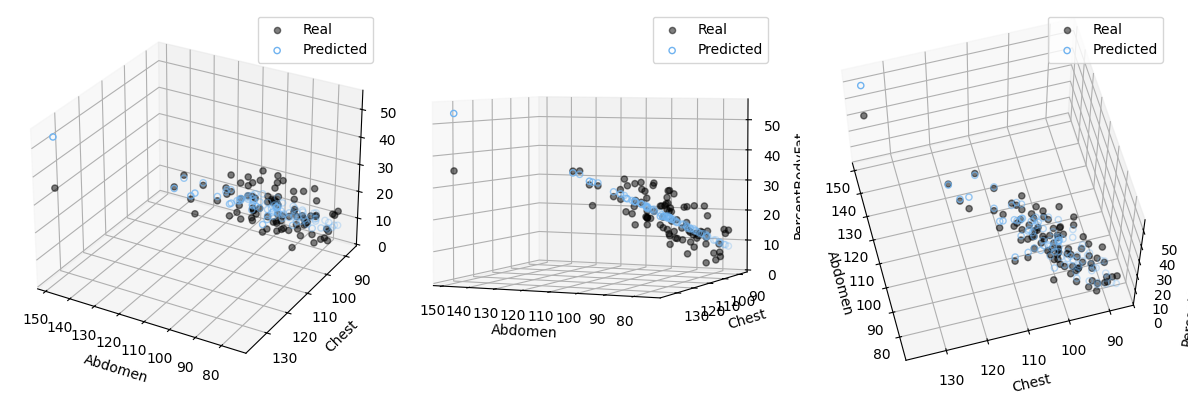

In [ ]:
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')
axes = [ax1, ax2, ax3]

for ax in axes:
    # Pikt reale
    ax.scatter(X1_test, X2_test, Y_test, color='black', label='Real', alpha=0.5)
    # Pikt e parashikuara
    ax.scatter(X1_test, X2_test, Y_pred, facecolor='none', edgecolor='#70b3f0', label='Predicted')
    ax.set_xlabel('Abdomen')
    ax.set_ylabel('Chest')
    ax.set_zlabel('PercentBodyFat')
    ax.legend()


ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)
fig.tight_layout()
plt.show()

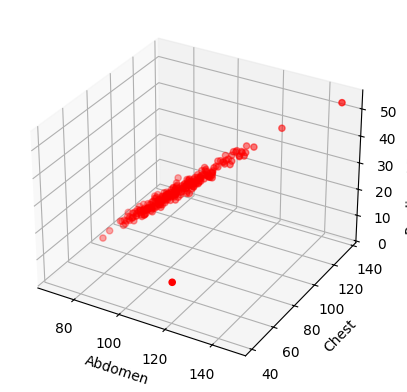

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Abdomen'], df['Chest'], model.predict(X), c='r', marker='o')
ax.set_xlabel('Abdomen')
ax.set_ylabel('Chest')
ax.set_zlabel('Predicted Body Fat %')
plt.show()